## Prevendo  o Consumo de cerveja em São Paulo

 - Link do dataset usado https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


%matplotlib inline

In [2]:
# Lendo dataset
df_beers = pd.read_csv("Consumo_cerveja.csv")

df_beers.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [3]:
# Renomeando as colunas para facilitar o uso
df_beers.columns = ['Data', 'Temp. Med', 'Temp. Min', 'Temp. Max', "Precipitacao", "FDS", 'Consumo']

In [4]:
df_beers.shape

(941, 7)

In [5]:
# Verificado formato das colunas
df_beers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          365 non-null    object 
 1   Temp. Med     365 non-null    object 
 2   Temp. Min     365 non-null    object 
 3   Temp. Max     365 non-null    object 
 4   Precipitacao  365 non-null    object 
 5   FDS           365 non-null    float64
 6   Consumo       365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [6]:
# O Df tem 941 colunas, porém apenas 365 são válidas, ao que parece todas as linhas após a 365 são nulas
# O método all confirma isso
all([all(df_beers[365:][coluna].isnull()) for coluna in df_beers.columns.to_list()])

True

In [7]:
# Removendo todos os itens nulos do dataset
df_beers.dropna(inplace=True)

In [8]:
# Verificando tamanho do DF
df_beers.shape

(365, 7)

In [30]:
# Transformando a coluna de Date em datetime
df_beers['Data'] = pd.to_datetime(df_beers['Data'])

In [10]:
# As colunas de temperatura e precipitação estão no formato texto,
# é preciso transformar formato numero para podermos realizar analises necessárias

# Alterando separador de decimal
colunas_para_transformar = ['Temp. Med', 'Temp. Min', 'Temp. Max', "Precipitacao",]

for coluna in colunas_para_transformar:
    df_beers[coluna] = df_beers[coluna].str.replace(",", ".").astype(float)
    
    
df_beers.head()

,Data,Temp. Med,Temp. Min,Temp. Max,Precipitacao,FDS,Consumo
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [11]:
# Confirmando a mudança no tipos dos dados
df_beers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          365 non-null    object 
 1   Temp. Med     365 non-null    float64
 2   Temp. Min     365 non-null    float64
 3   Temp. Max     365 non-null    float64
 4   Precipitacao  365 non-null    float64
 5   FDS           365 non-null    float64
 6   Consumo       365 non-null    float64
dtypes: float64(6), object(1)
memory usage: 22.8+ KB


In [12]:
# Estatisticas descritivas
df_beers.describe()

,Temp. Med,Temp. Min,Temp. Max,Precipitacao,FDS,Consumo
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


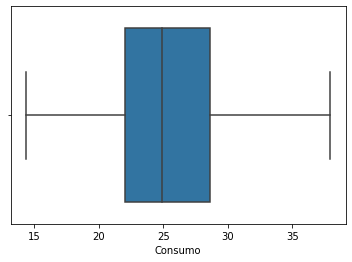

In [16]:
# A média e a mediana do consumo são bem próximas 
# o que indica que provavelmente nossos dados não tem outliers
sns.boxplot(df_beers['Consumo'])

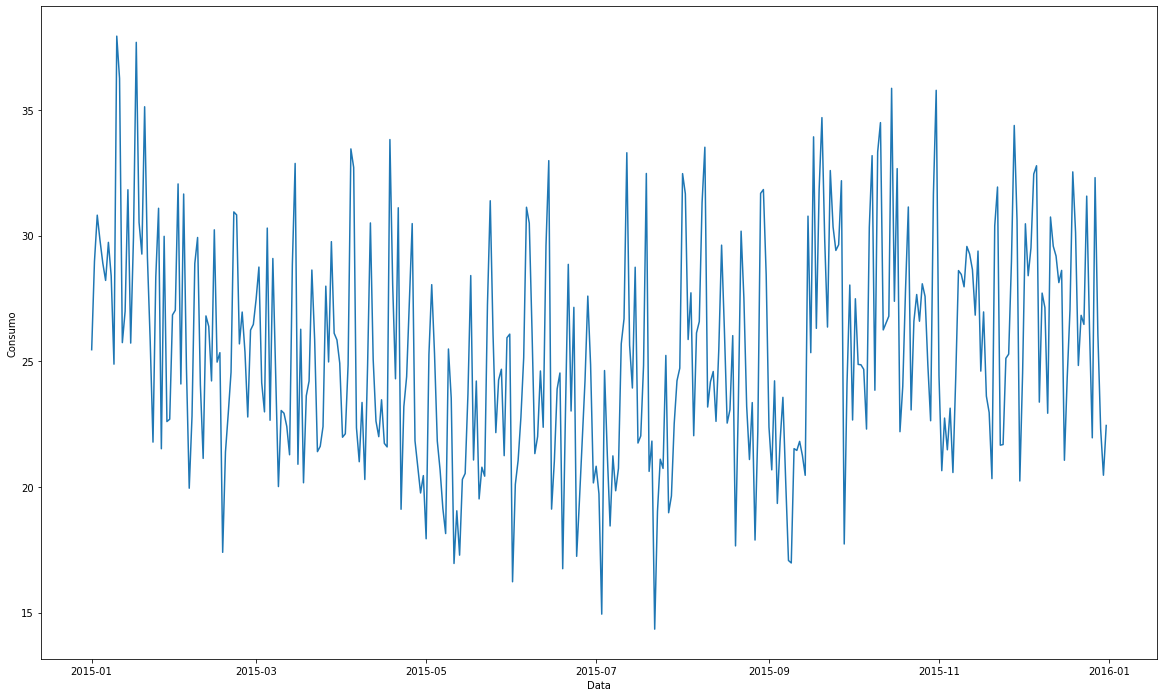

In [135]:
# Consumo durante o ano
plt.figure(figsize=(20,12))
sns.lineplot(x='Data', y='Consumo', data=df_beers)

In [41]:
df_beers.head()

,Data,Temp. Med,Temp. Min,Temp. Max,Precipitacao,FDS,Consumo
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


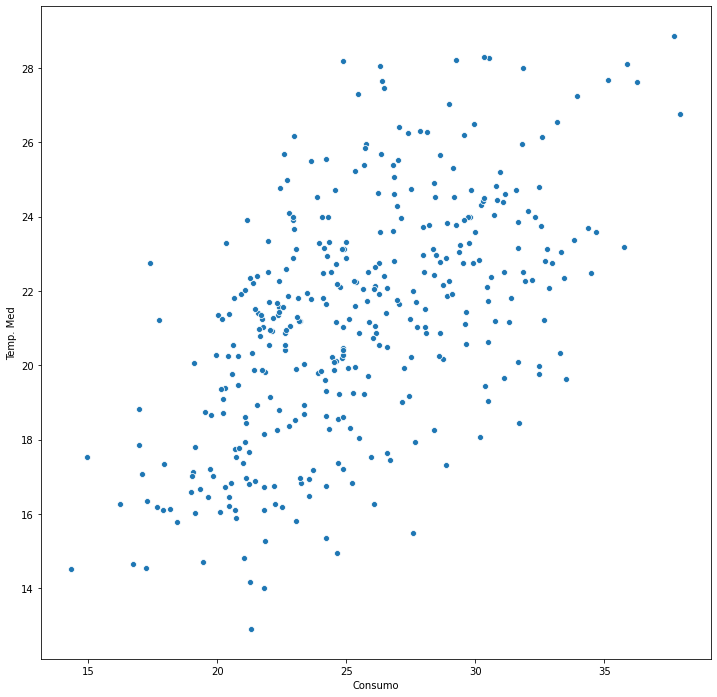

In [71]:
# Distribuição mostrando o aumento no consumo de cerveja conforme a temperatura média aumenta
plt.figure(figsize=(12,12))
sns.scatterplot(y='Temp. Med', x='Consumo', data=df_beers)

In [65]:
# Adicionando coluna de mês
df_beers['Mes'] = df_beers['Data'].dt.month
df_beers.head()

,Data,Temp. Med,Temp. Min,Temp. Max,Precipitacao,FDS,Consumo,Mes
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,1
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,1
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,1
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,1
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,1


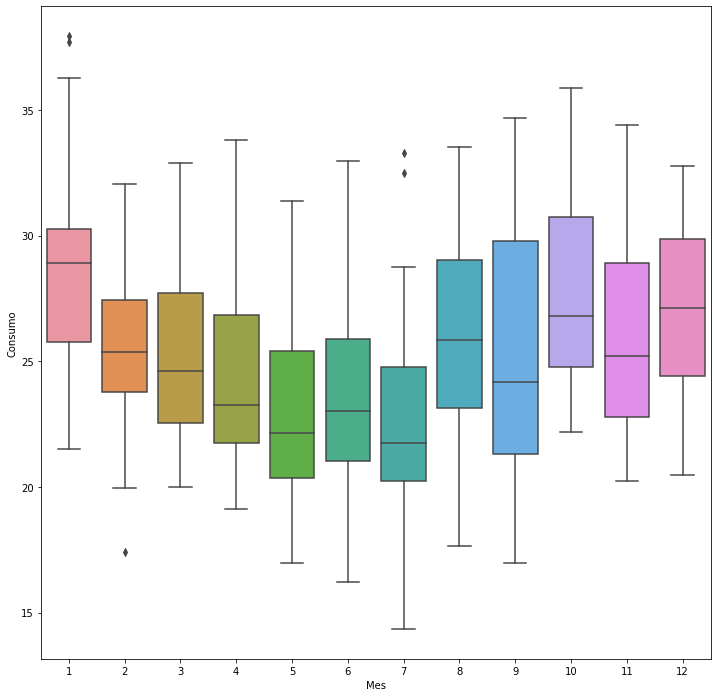

In [69]:
# Váriaçao de consumo durante os meses do ano
plt.figure(figsize=(12,12))
sns.boxplot(x='Mes', y='Consumo', data=df_beers)

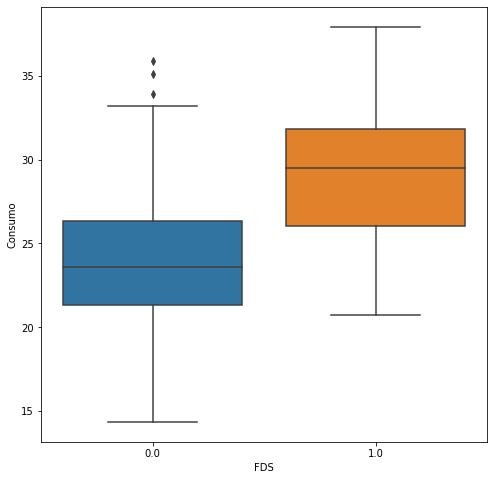

In [79]:
# Váriaçao de consumo entre dia útil vs finais de semana
plt.figure(figsize=(8,8))
sns.boxplot(x='FDS', y='Consumo', data=df_beers)

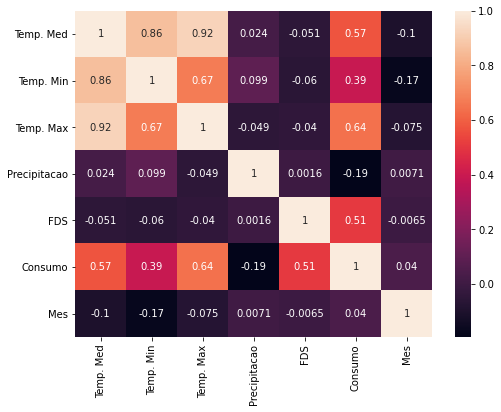

In [74]:
# Relação entre consumo e as outras variáveis
plt.figure(figsize=(8,6))
sns.heatmap(df_beers.corr(), annot=True)

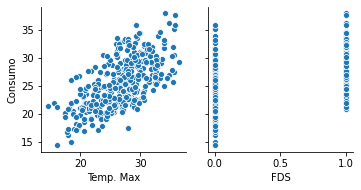

In [75]:
# Existe uma relação média entre consumo e temp. max e uma relação mais baixa com o FDS
sns.pairplot(y_vars=['Consumo'], x_vars=['Temp. Max', 'FDS'], data=df_beers)

In [80]:
# Separando as variaveis independentes e dependente
X = df_beers[['Temp. Max', 'FDS']]
y = df_beers['Consumo']

In [81]:
# Separando os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
# Criando e treinando o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [101]:
index = ['Intercepto', 'Temp. Max', 'Final de Semana']
intercept = modelo.intercept_.round(3)

In [103]:
pd.DataFrame(np.append(modelo.intercept_, modelo.coef_).round(3), index=index, columns=["Parâmetros"])

,Parâmetros
Intercepto,5.921
Temp. Max,0.676
Final de Semana,5.195


Breve explicação sobre a tabela acima:
 - Intercepto representa o quanto seria nossa váriavel depetendente (y) caso não houvesse qualquer interferência das váriaveis indepentendes (x)
 - A linha Temp. Max indica que para cada aumento de °C o consumo de cerveja aumenta em 676 litros
 - E em finais de semana o aumento no consumo aumenta em 5 mil litros



In [110]:
# Fazendo a previsão dos dados de teste
pred = modelo.predict(X_test)

In [122]:
MAE = metrics.mean_absolute_error(y_test, pred).round(3)
MSE = np.sqrt(metrics.mean_squared_error(y_test, pred)).round(3)

In [125]:
#erro médio absoluto
print("MAE: " + str(MAE)) # O MAE nos diz que em média nosso modelo erra em 2.184 
# erro médio ao quadrado
print("MSE: "+ str(MSE)) # Como quase não tem outlier nos dados, o nosso MSE não foi muito alto

MAE: 2.184
MSE: 2.633


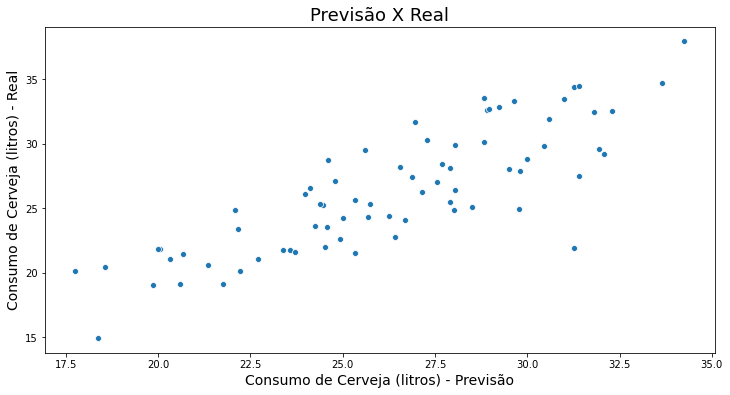

In [129]:
# Consumo previsto vs real
ax = sns.scatterplot(x=pred, y=y_test)
ax.figure.set_size_inches(12,6)
ax.set_title("Previsão X Real", fontsize=18)
ax.set_xlabel("Consumo de Cerveja (litros) - Previsão", fontsize=14)
ax.set_ylabel("Consumo de Cerveja (litros) - Real", fontsize=14)
ax

In [ ]:
residuos = y_test - pred

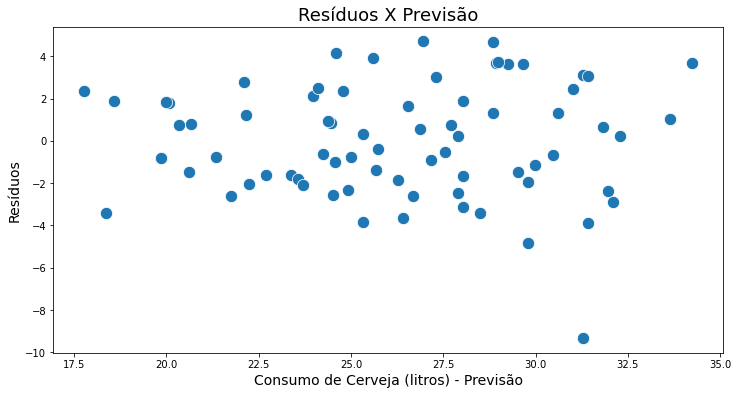

In [133]:
# Verificando a disperção entre Resíduos e os dados previsto
# Os dados indicam que há Homocedasticidade nos nosso dados
# ou seja a dispersão é constante
ax = sns.scatterplot(x=pred, y=residuos, s=150)
ax.figure.set_size_inches(12,6)
ax.set_title("Resíduos X Previsão", fontsize=18)
ax.set_xlabel("Consumo de Cerveja (litros) - Previsão", fontsize=14)
ax.set_ylabel("Resíduos", fontsize=14)
ax

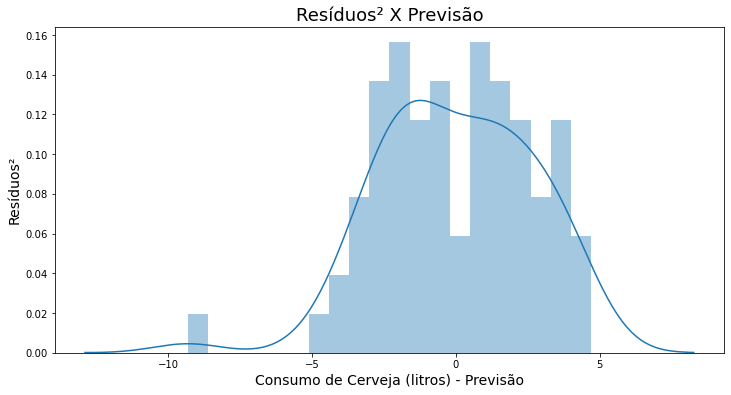

In [134]:
# O gráfico de dispersão dos residuos mostra uma dispersão perto do normal
ax = sns.distplot(residuos, bins=20)
ax.figure.set_size_inches(12,6)
ax.set_title("Resíduos² X Previsão", fontsize=18)
ax.set_xlabel("Consumo de Cerveja (litros) - Previsão", fontsize=14)
ax.set_ylabel("Resíduos²", fontsize=14)
ax